In [30]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
import matplotlib.pyplot as plt
import random
nx.__version__

'2.2'

In [2]:
read_data = pd.read_csv("pnas.1713568115.sd01.txt")
read_data = read_data[read_data['trial'] == 1]  #take the data for the 1st trial only
data = read_data
data.head(10)
#print(len(data))
#type(data)

data['time'] = data['end'] - data['begin']#store the diff btw begin and end to get total time for each trans. in ms
data['time'] = data['time']/1000.0 #change ms to s
data['time'] = data['time'].map(lambda x: [x])

In [3]:
data.head(10)

trial  id1  id2         begin           end      time
0      1  201  219  1.373105e+12  1.373105e+12     [2.0]
1      1  201  219  1.373109e+12  1.373109e+12    [42.0]
2      1  201  242  1.373119e+12  1.373119e+12     [2.0]
3      1  201  242  1.373119e+12  1.373119e+12   [2.999]
4      1  201  255  1.372958e+12  1.372958e+12  [41.999]
5      1  201  259  1.372937e+12  1.372937e+12    [15.0]
6      1  201  259  1.373041e+12  1.373041e+12     [3.0]
7      1  201  259  1.373240e+12  1.373240e+12     [8.0]
8      1  201  262  1.373360e+12  1.373360e+12  [27.999]
9      1  201  263  1.373178e+12  1.373178e+12     [2.0]

In [4]:
id1_unique = data['id1'].unique()
id2_unique = data['id2'].unique()
len(id2_unique)

1159

In [5]:
data = data.groupby(['id1','id2']).agg({'time': 'sum'}) #group by id1 and id2 as nodes and time as a list of weights
data.head(100)

time
id1 id2                                                   
201 219                                        [2.0, 42.0]
    242                                       [2.0, 2.999]
    255                                           [41.999]
    259                                   [15.0, 3.0, 8.0]
    262                                           [27.999]
    263                                              [2.0]
    264                                              [3.0]
    267                                              [2.0]
    268                                         [5.0, 3.0]
    271                             [3.0, 13.0, 8.0, 13.0]
    272                                 [26.999, 2.0, 8.0]
    275                                        [12.0, 4.0]
    277                                              [3.0]
    279                                         [2.0, 2.0]
    280                                              [5.0]
    288                                           [10.999]
    289                                              [2.0]
    301                                         [2.0, 2.0]
    315                                   [18.0, 3.0, 2.0]
    332                                  [5.0, 7.999, 5.0]
    334                                             [19.0]
    335                                            [6.999]
    336                                         [2.0, 3.0]
    338                                              [2.0]
    340                                              [6.0]
    342                                       [4.0, 3.999]
    344                                              [2.0]
    347                                              [4.0]
    351                                              [2.0]
    355                                         [3.0, 5.0]
...                                                    ...
    495                                              [4.0]
    496                                              [4.0]
    498                                              [2.0]
    509                                              [4.0]
    511                                              [3.0]
    513                                         [7.0, 3.0]
    518                                              [2.0]
    520  [13.0, 2.0, 4.0, 2.0, 4.0, 4.0, 16.0, 10.0, 86...
    522                                              [6.0]
    549                                         [2.0, 2.0]
    555                                       [3.0, 9.999]
    556                              [3.0, 2.0, 4.0, 10.0]
    557                                    [7.0, 2.0, 2.0]
    564                                        [13.0, 2.0]
    567                                              [2.0]
    575                                              [2.0]
    576                                              [3.0]
    578                                             [10.0]
    594                                              [5.0]
    604                                              [4.0]
    608                                         [3.0, 3.0]
    613                                              [4.0]
    622                                              [3.0]
    623                                              [2.0]
    636                                              [2.0]
    637                                      [2.999, 26.0]
    639                             [42.0, 11.999, 18.999]
    640                                              [4.0]
    645                                              [3.0]
    647                                              [2.0]

[100 rows x 1 columns]

In [6]:
data = data.reset_index() #reset index after group by as there are some none values for column id1

In [7]:
data.head(10)

id1  id2                    time
0  201  219             [2.0, 42.0]
1  201  242            [2.0, 2.999]
2  201  255                [41.999]
3  201  259        [15.0, 3.0, 8.0]
4  201  262                [27.999]
5  201  263                   [2.0]
6  201  264                   [3.0]
7  201  267                   [2.0]
8  201  268              [5.0, 3.0]
9  201  271  [3.0, 13.0, 8.0, 13.0]

In [8]:
G = nx.Graph() #initialize the graph
for index, row in data.iterrows():
    #print(row[0],row[1],row[2])
    G.add_edge(row[0],row[1], weight = row[2]) #add node1,node2,weight list iteratively to the graph
    


In [9]:
#print(G.edges)
nodes = list(G.nodes)
len(set(nodes)) #number of unique nodes

1164

In [10]:
l = list(G.edges)
len(set(l)) #number of unique edges

200723

In [11]:
print(len(G.edges))

200723


In [12]:
e = [(u, v) for (u, v, d) in G.edges(data=True)][:5000] #do it for 5000 edges as there are too many edges
pos = nx.random_layout(G)  #positions for all nodes



In [13]:
# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (56, 28))
# Font size to 14
matplotlib.rc('font', size = 14)
# Add grid lines
matplotlib.rc('axes', grid = True)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

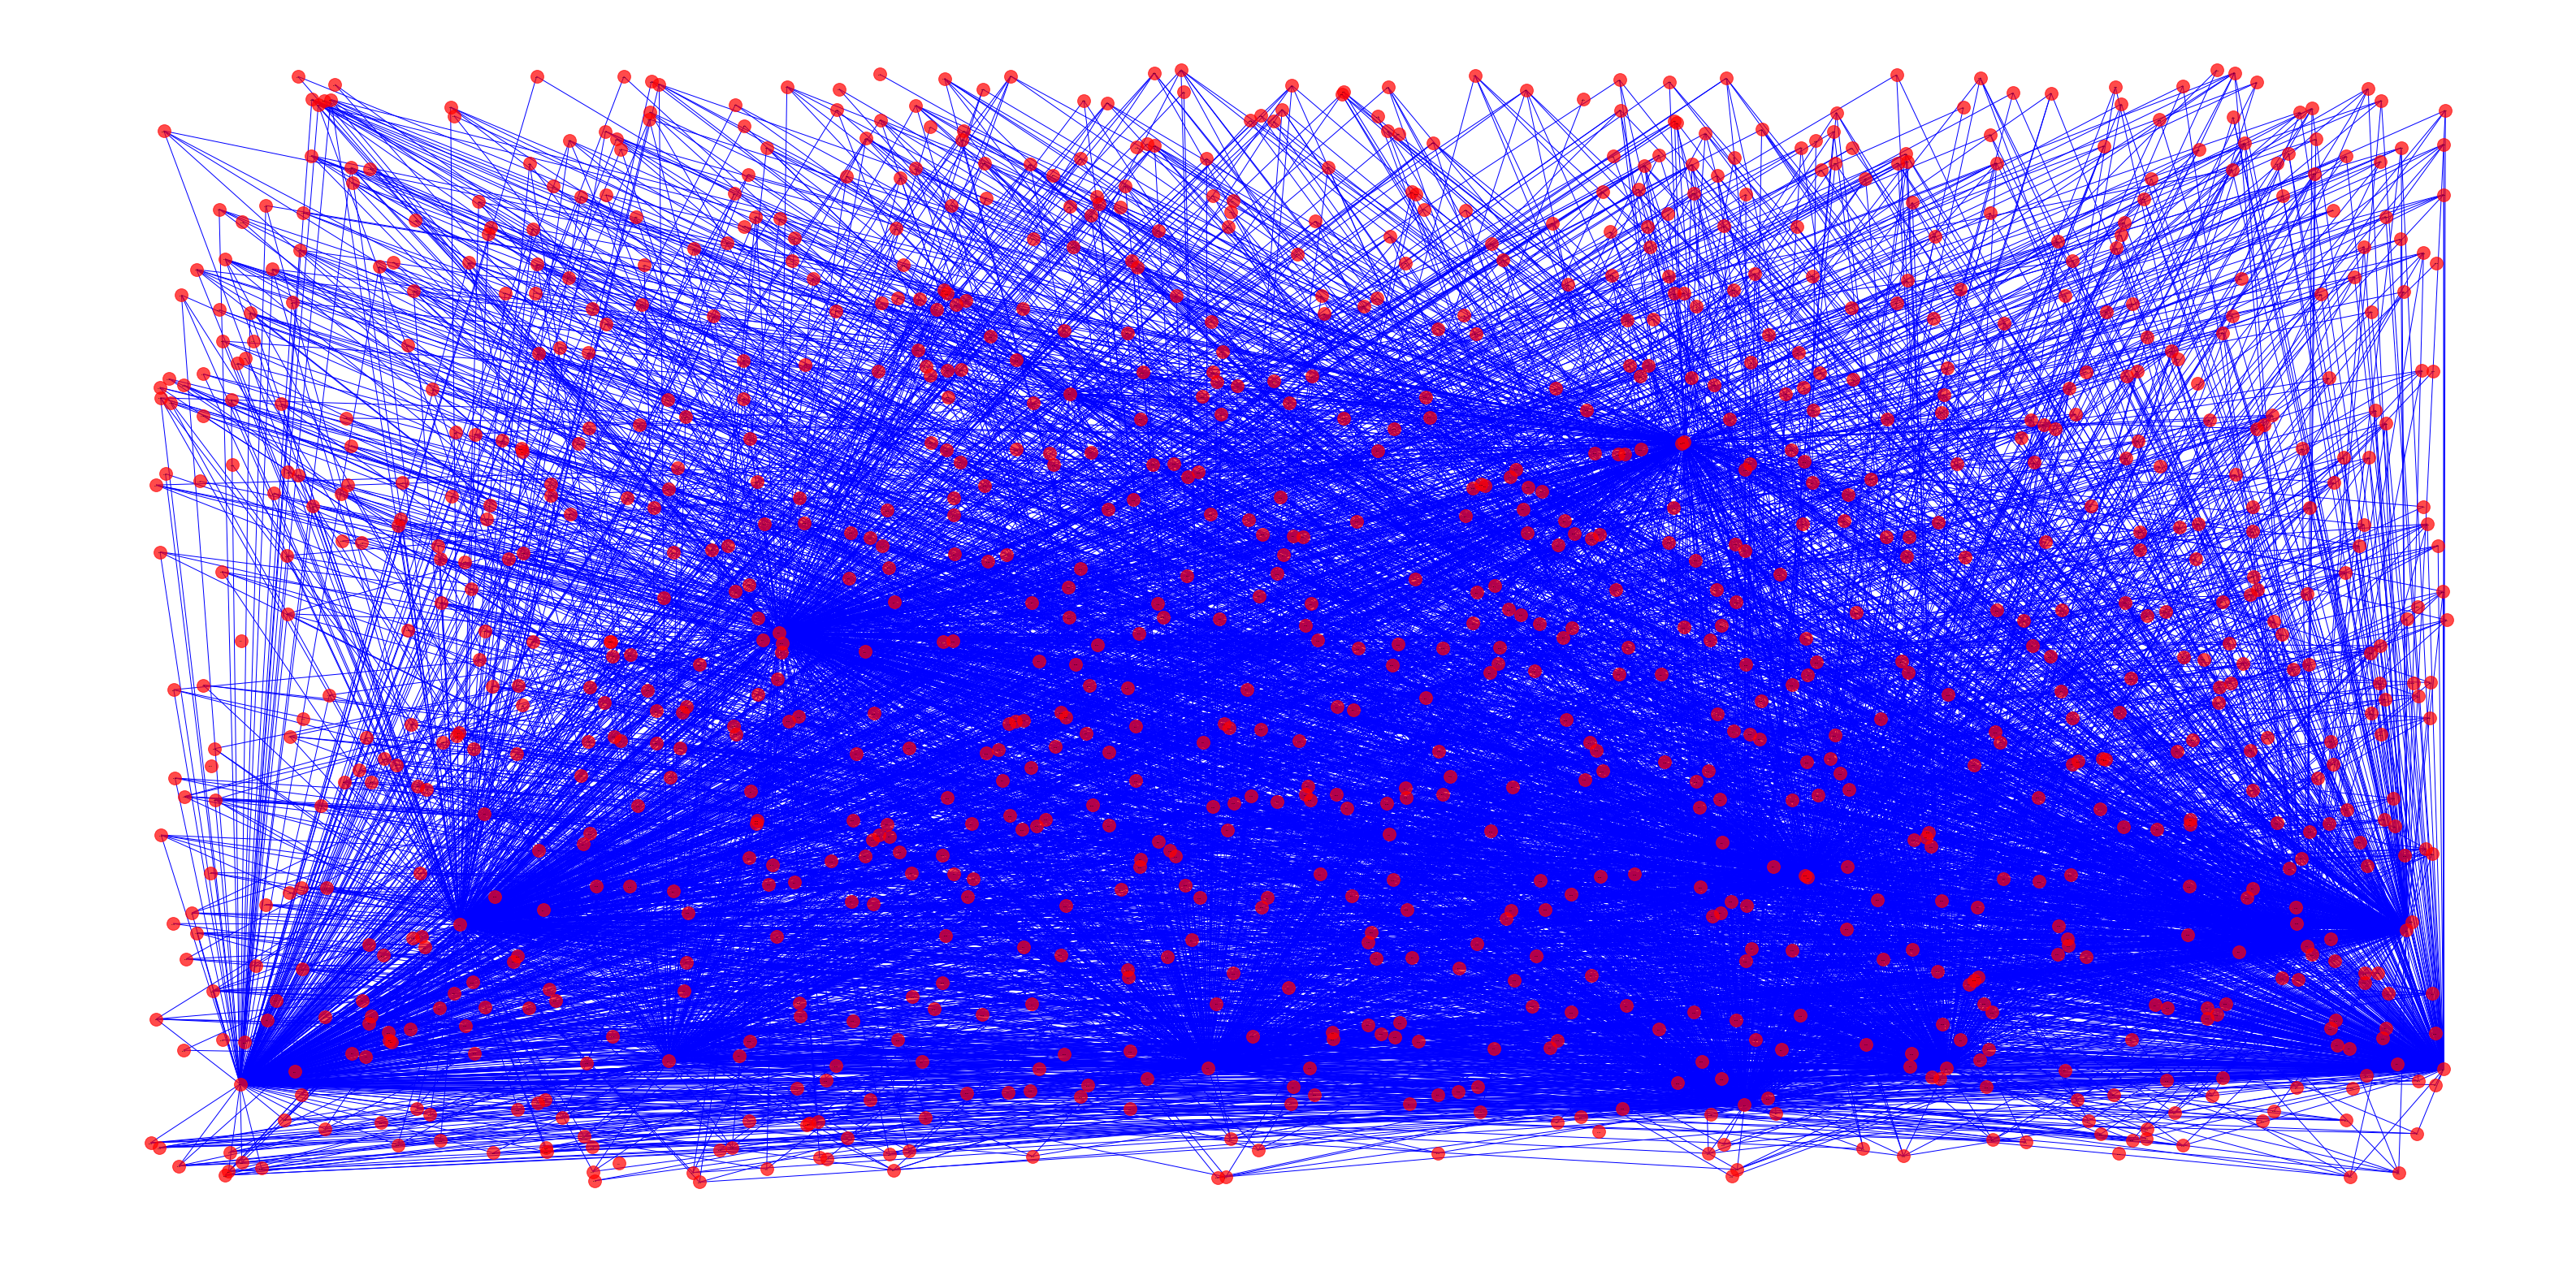

In [15]:
# nodes
nx.draw_networkx_nodes(G,pos,node_size=250, alpha=0.7, with_labels=False, edge_color='0.4')

# edges
nx.draw_networkx_edges(G, pos, edgelist=e,edge_color='b',
                       width=1)
# labels
nx.draw_networkx_labels(G, pos, font_size=2, font_family='sans-serif')

plt.axis('off')
plt.show()

In [18]:
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(G,weight=None)
c

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [26]:
nx.__version__

'2.1'

In [19]:
G_bee = nx.Graph() #initialize the graph
for index, row in data.iterrows():
    #print(row[0],row[1],row[2])
    G_bee.add_edge(row[0],row[1]) #add node1,node2,weight list iteratively to the graph
    


In [21]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(G_bee,weight=None))
c

[frozenset({219,
            242,
            256,
            257,
            258,
            262,
            263,
            264,
            265,
            267,
            272,
            276,
            280,
            286,
            288,
            290,
            293,
            296,
            298,
            299,
            301,
            314,
            315,
            329,
            336,
            337,
            338,
            344,
            345,
            347,
            349,
            351,
            361,
            370,
            372,
            376,
            384,
            391,
            393,
            394,
            404,
            406,
            417,
            422,
            429,
            433,
            438,
            439,
            444,
            449,
            454,
            456,
            457,
            462,
            466,
            470,
            474,
            481,
            48

In [24]:
print(len(c[0]))
print(len(c[1]))
print(len(c[2]))

580
564
20


In [28]:
k = list(nx.find_cliques(G))
k

KeyboardInterrupt: 

In [ ]:
from networkx.algorithms.community import k_clique_communities
c = list(k_clique_communities(G, k))

In [45]:
p = [0.1]
node_list = list(G.nodes())
cascade_list = []
for prob in p: 
    
    while len(node_list)!= 0:
        infect_list = []
        first = random.choice(node_list) #the first infected node
        infect_list.append(first)#the first infected node
        neighbors_current = list(G.neighbors(first))
        for potential_node in neighbors_current:
                        if potential_node not in infect_list:
                            if np.random.rand() < prob:
                                infect_list.append(potential_node)
        node_list.remove(first)
        #print(node_list)
        cascade_list.append(infect_list)


In [50]:
print(cascade_list)

[[1758, 288, 349, 446, 475, 594, 622, 637, 654, 728, 735, 850, 878, 955, 971, 989, 1037, 1078, 1193, 1197, 1200, 1205, 1225, 1241, 1267, 1269, 1284, 1306, 1350, 1461, 1539, 1542, 1733, 1789, 1806, 1815, 1835, 1851, 1948, 2037], [810, 255, 275, 282, 337, 382, 485, 506, 564, 615, 650, 651, 673, 733, 736, 762, 811, 876, 883, 920, 1114, 1151, 1243, 1273, 1470, 1473, 1483, 1493, 1515, 1529, 1563, 1655, 1661, 1752, 1808, 1981, 1993, 2004], [1259, 242, 328, 454, 470, 485, 501, 567, 601, 615, 618, 647, 688, 767, 775, 855, 874, 969, 1005, 1074, 1114, 1187, 1201, 1209, 1220, 1228, 1243, 1252, 1273, 1306, 1422, 1671, 1749, 1751, 1765, 1948], [1461, 276, 331, 411, 422, 433, 449, 482, 484, 486, 604, 635, 677, 712, 793, 906, 949, 956, 972, 1054, 1059, 1063, 1193, 1216, 1217, 1284, 1299, 1350, 1395, 1442, 1468, 1484, 1496, 1497, 1502, 1528, 1582, 1607, 1626, 1671, 1821, 1842, 1995, 2028, 2031, 2032], [490, 793, 1662], [482, 280, 468, 475, 553, 714, 729, 736, 769, 935, 949, 983, 1087, 1168, 1302, 1535

In [48]:
print(len(list(G.nodes)))

1164


In [ ]:
p = [0.1]
node_list = list(G.nodes())
cascade_list = []
for prob in p: 
    
    while len(node_list)!= 0:
        infect_list = [] #the nodes infected by first node
        first = random.choice(node_list) #the first infected node
        node_list.remove(first)
        infect_list.append(first)#the first infected node
        neighbors_current = list(G.neighbors(first))
        for potential_node in neighbors_current:
                        if potential_node not in infect_list:
                            if np.random.rand() < prob:
                                infect_list.append(potential_node)
                                node_list.remove(potential_node)
        
        #print(node_list)
        cascade_list.append(infect_list)